In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier

from preprocessor import preprocess

In [20]:
columns = [
    "duration",
    "protocol_type",
    "service",
    "flag",
    "src_bytes",
    "dst_bytes",
    "land",
    "wrong_fragment",
    "urgent",
    "hot",
    "num_failed_logins",
    "logged_in",
    "num_compromised",
    "root_shell",
    "su_attempted",
    "num_root",
    "num_file_creations",
    "num_shells",
    "num_access_files",
    "num_outbound_cmds",
    "is_host_login",
    "is_guest_login",
    "count",
    "srv_count",
    "serror_rate",
    "srv_serror_rate",
    "rerror_rate",
    "srv_rerror_rate",
    "same_srv_rate",
    "diff_srv_rate",
    "srv_diff_host_rate",
    "dst_host_count",
    "dst_host_srv_count",
    "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate",
    "dst_host_srv_serror_rate",
    "dst_host_rerror_rate",
    "dst_host_srv_rerror_rate",
    "outcome",
    "level",
]

data = pd.read_csv(r"C:\Users\lenovo\Downloads\KDDTrain+_20Percent.txt")
data.columns = columns

data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [5]:
encoder = preprocessing.OneHotEncoder(handle_unknown="ignore", sparse_output=True)
scaler = preprocessing.RobustScaler()
x, y, levels, encoder = preprocess(data, scaler, encoder, True)

In [6]:
x.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,-0.158273,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.003597,0.239655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.079137,7.651724,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,-0.057554,0.000000,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.025180,2.032759,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [7]:
xtrain, xdev, ytrain, ydev = train_test_split(x, y, test_size=0.2, random_state=123)
xtrain_reg, xdev_reg, ytrain_reg, ydev_reg = train_test_split(x, levels, test_size=0.2, random_state=123)

In [8]:
classifier = RandomForestClassifier()
classifier.fit(xtrain, ytrain)

RandomForestClassifier()

In [9]:
ypred = classifier.predict(xdev)

accuracy = accuracy_score(ydev, ypred)
precision = precision_score(ydev, ypred, average='binary')
recall = recall_score(ydev, ypred, average='binary') 

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Accuracy: 0.9962813968425679
Precision: 0.9975272007912958
Recall: 0.994716077215725


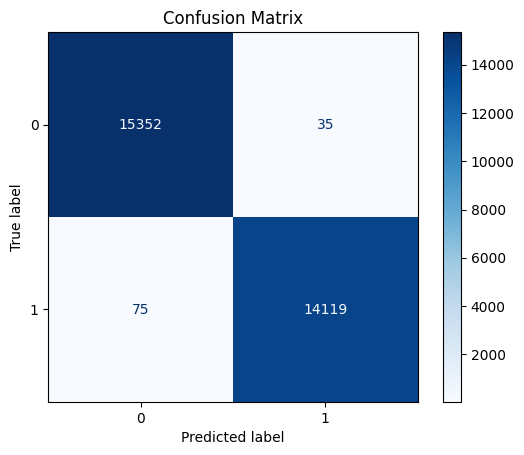

In [10]:
cm = confusion_matrix(ydev, ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [17]:
importances = classifier.feature_importances_

feature_importances = pd.DataFrame({'feature': xtrain.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False).reset_index()
feature_importances = feature_importances.drop(columns=["index"])
feature_importances.head()

,feature,importance
0,dst_bytes,0.124312
1,src_bytes,0.122650
2,same_srv_rate,0.068203
3,flag_SF,0.065565
4,dst_host_same_srv_rate,0.048842


In [18]:
feature_importances.to_csv(r"feature_importance.csv", index=False)